In [177]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [178]:
raw_data = pd.read_csv("data/train.csv")
print(raw_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Filter only some relevant features

In [179]:
selected_features = ["LotArea", "YearBuilt", "YearRemodAdd", "YrSold", "BedroomAbvGr", "SalePrice"]
selected_features=raw_data.columns.to_list()
data = raw_data[selected_features].copy()
selected_features.remove("SalePrice")
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [180]:
print(data.isna().sum())
print(data.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [181]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

edges = [0, 1970, 1990, 2000, 2050]
labels = ["a", "b", "c", "d"]
data["YearRemodAdd"] = pd.cut(data['YearRemodAdd'], edges, labels=labels)

edges = [0, 1900, 1950, 1980, 2000, 2010, 2050]
labels = ["a", "b", "c", "d", "e", "f"]
data["YearBuilt"] = pd.cut(data['YearBuilt'], edges, labels=labels)

edges = [0., 1.1, 2.1, 3.1, 4.1, 10.]
labels = ["a", "b", "c", "d", "e"]
data["BedroomAbvGr"] = pd.cut(data['BedroomAbvGr'], edges, labels=labels)

#data['PoolArea'] = data['PoolArea'].isin([0]).astype(int)
'''data["OpenPorchSF"] = np.log(1 + data["OpenPorchSF"])
data["EnclosedPorch"] = np.log(1 + data["EnclosedPorch"])
data["3SsnPorch"] = np.log(1 + data["3SsnPorch"])
data["ScreenPorch"] = np.log(1 + data["ScreenPorch"])'''
#data["LotFrontage"] = np.log(1 + data["LotFrontage"])

'data["OpenPorchSF"] = np.log(1 + data["OpenPorchSF"])\ndata["EnclosedPorch"] = np.log(1 + data["EnclosedPorch"])\ndata["3SsnPorch"] = np.log(1 + data["3SsnPorch"])\ndata["ScreenPorch"] = np.log(1 + data["ScreenPorch"])'

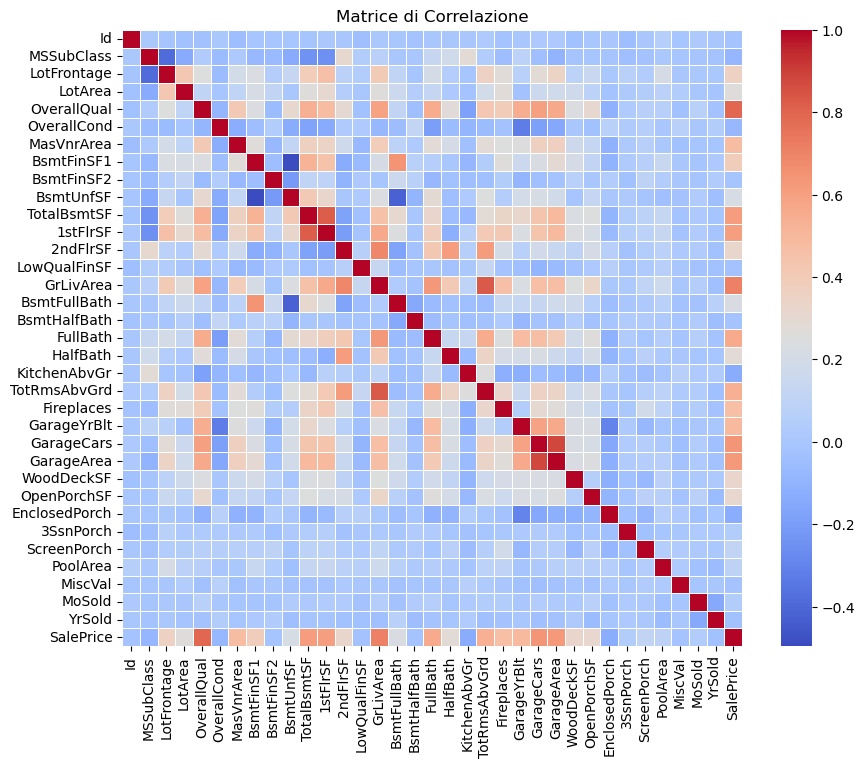

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supponiamo di avere un DataFrame chiamato 'df'
# df = pd.read_csv('tuo_dataset.csv')

# Calcolare la matrice di correlazione
corr_matrix = data[data.select_dtypes(include=[np.number]).columns].corr()

# Creare il grafico della matrice di correlazione con seaborn
plt.figure(figsize=(10, 8))  # Puoi modificare la dimensione in base alle tue esigenze
sns.heatmap(corr_matrix, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Aggiungere un titolo
plt.title('Matrice di Correlazione')

# Mostrare il grafico
plt.show()

Id
Id
1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: count, Length: 1460, dtype: int64


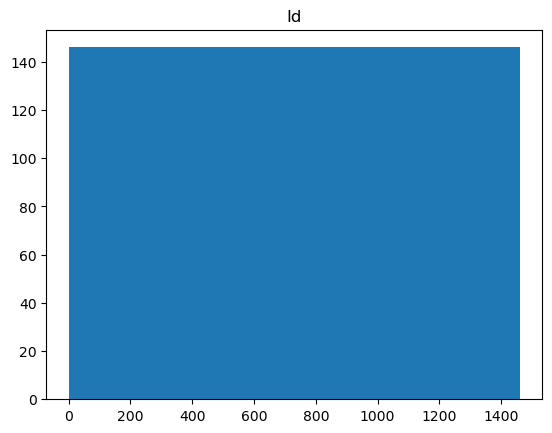

MSSubClass
MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64


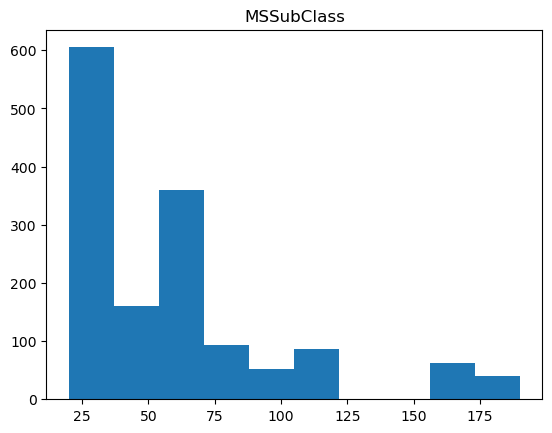

MSZoning
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64


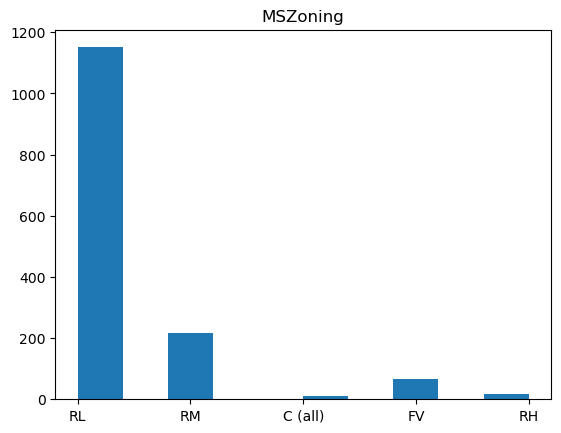

LotFrontage
LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64


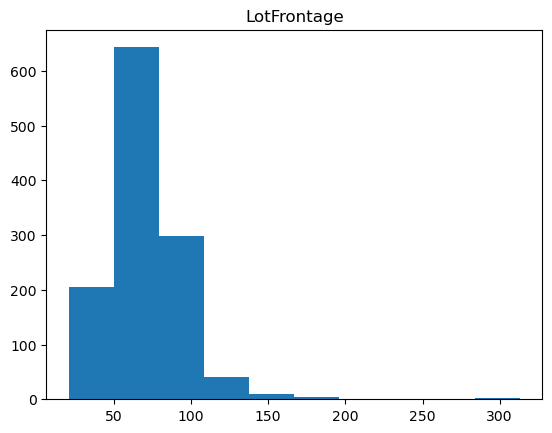

LotArea
LotArea
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: count, Length: 1073, dtype: int64


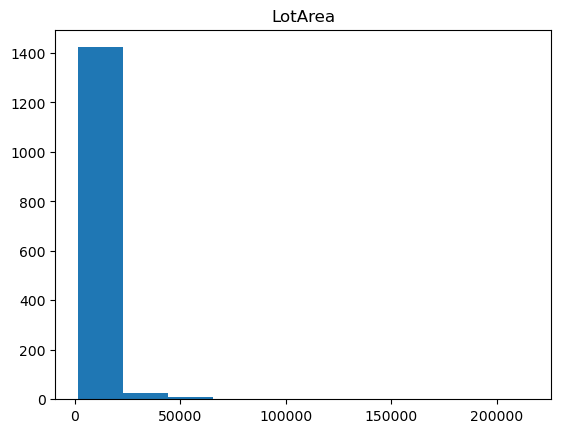

Street
Street
Pave    1454
Grvl       6
Name: count, dtype: int64


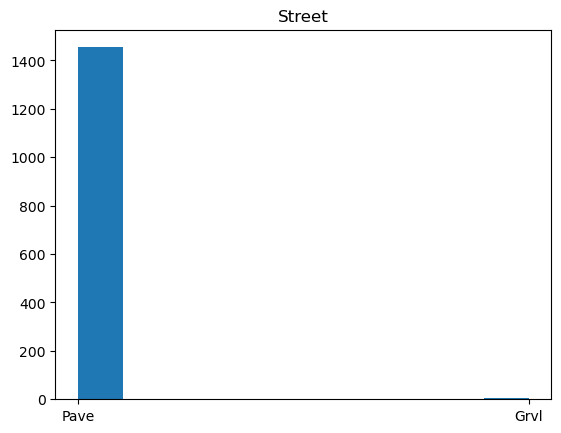

Alley
Alley
Grvl    50
Pave    41
Name: count, dtype: int64
LotShape
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
LandContour
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
Utilities
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
LotConfig
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64
LandSlope
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64
Neighborhood
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64
Condition1
Condition1
Norm      1260
Feedr 

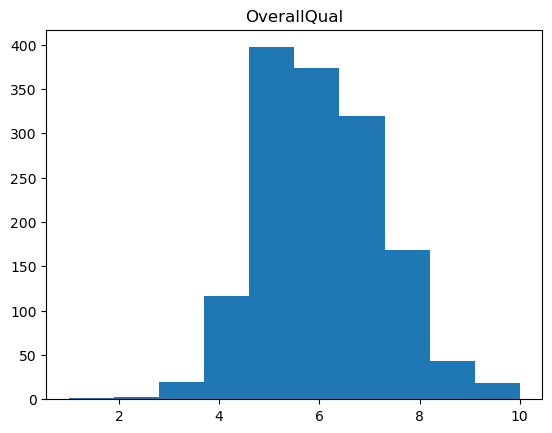

OverallCond
OverallCond
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: count, dtype: int64


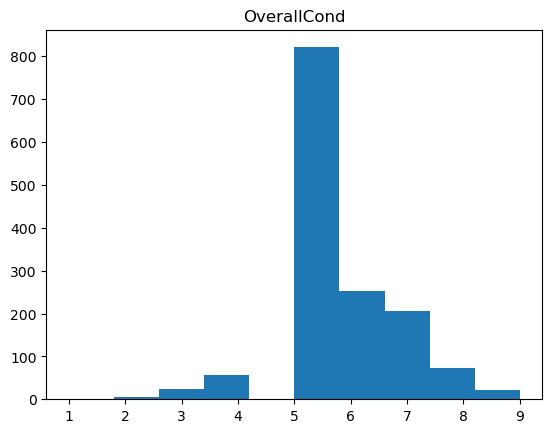

YearBuilt
YearBuilt
c    520
e    364
b    313
d    238
a     25
f      0
Name: count, dtype: int64


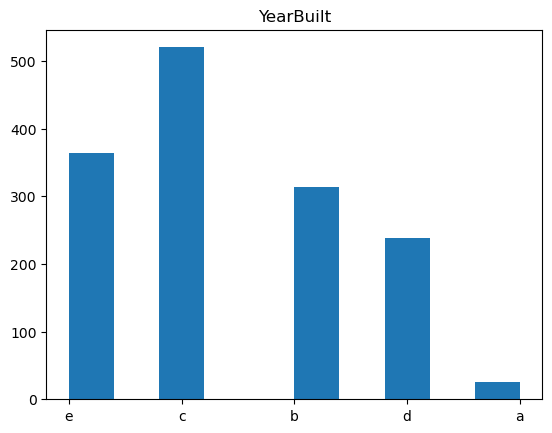

YearRemodAdd
YearRemodAdd
d    497
a    433
c    285
b    245
Name: count, dtype: int64


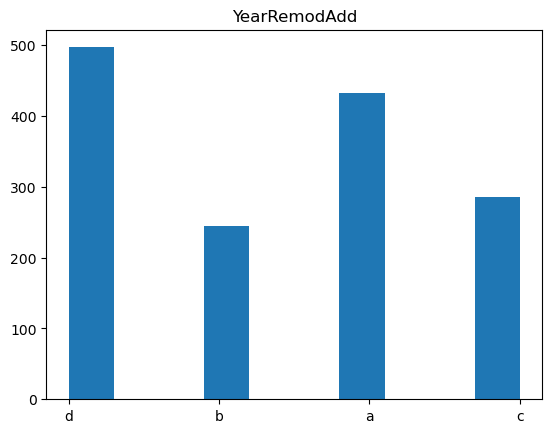

RoofStyle
RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: count, dtype: int64


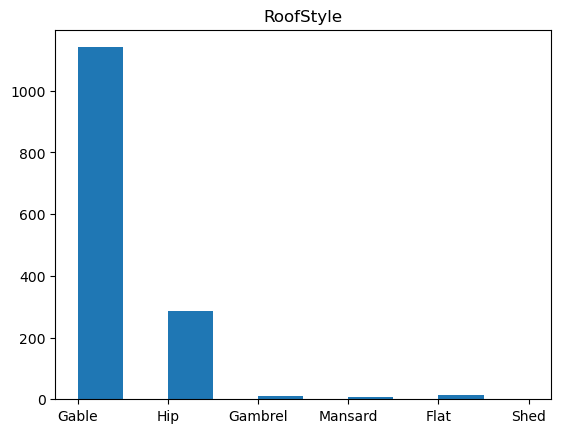

RoofMatl
RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64


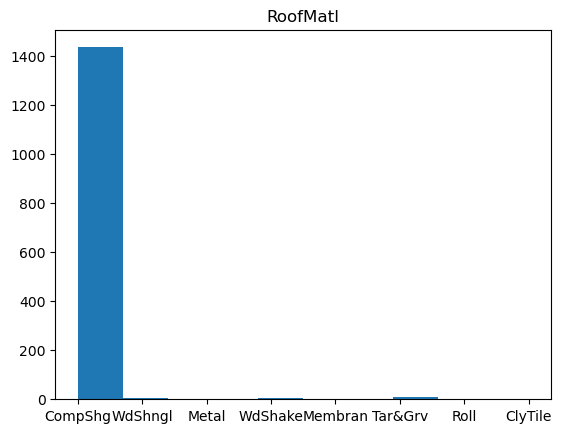

Exterior1st
Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64


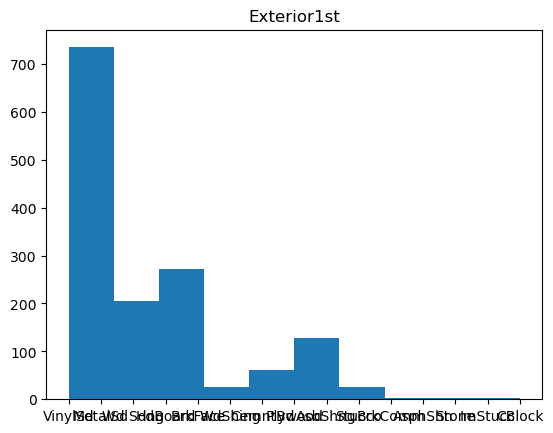

Exterior2nd
Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: count, dtype: int64


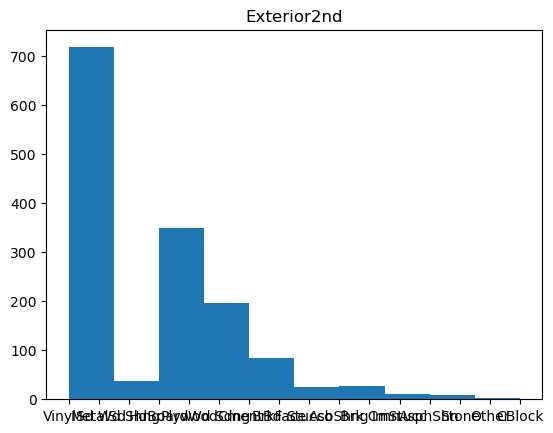

MasVnrType
MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64
MasVnrArea
MasVnrArea
0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: count, Length: 327, dtype: int64


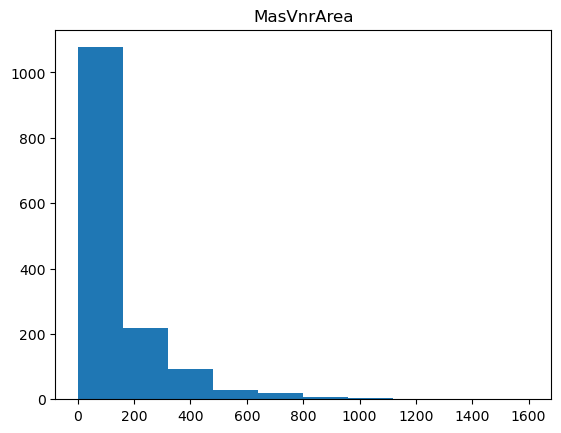

ExterQual
ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64


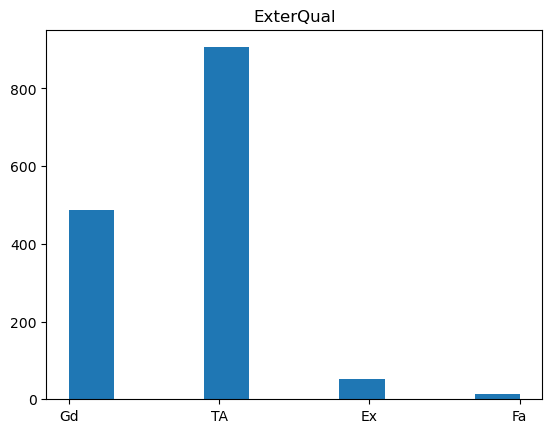

ExterCond
ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64


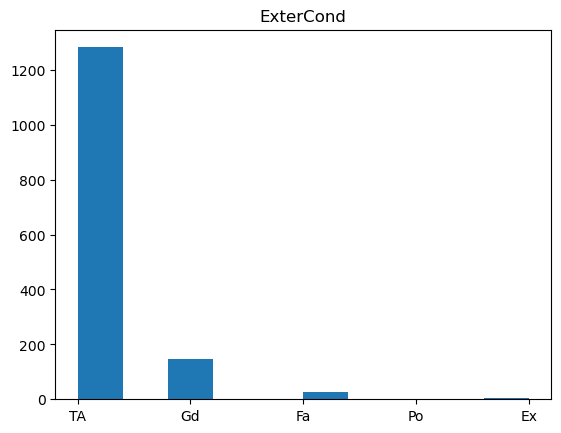

Foundation
Foundation
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: count, dtype: int64


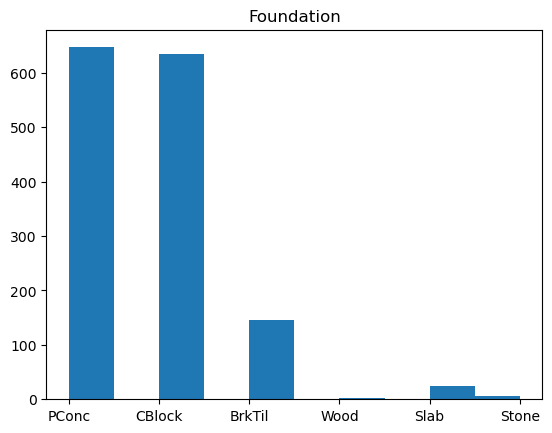

BsmtQual
BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64
BsmtCond
BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64
BsmtExposure
BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64
BsmtFinType1
BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64
BsmtFinSF1
BsmtFinSF1
0       467
24       12
16        9
686       5
662       5
       ... 
1338      1
1324      1
1460      1
328       1
830       1
Name: count, Length: 637, dtype: int64


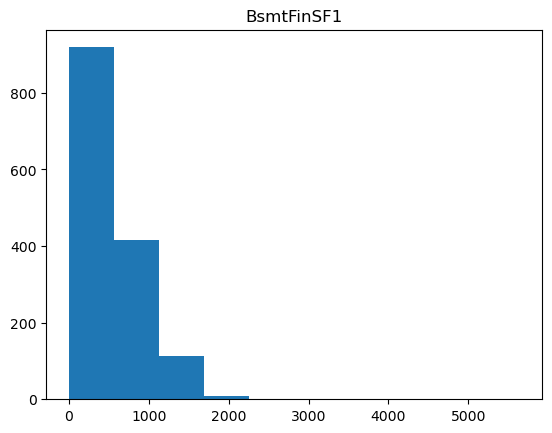

BsmtFinType2
BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64
BsmtFinSF2
BsmtFinSF2
0       1293
180        5
374        3
551        2
147        2
        ... 
532        1
165        1
1120       1
311        1
1029       1
Name: count, Length: 144, dtype: int64


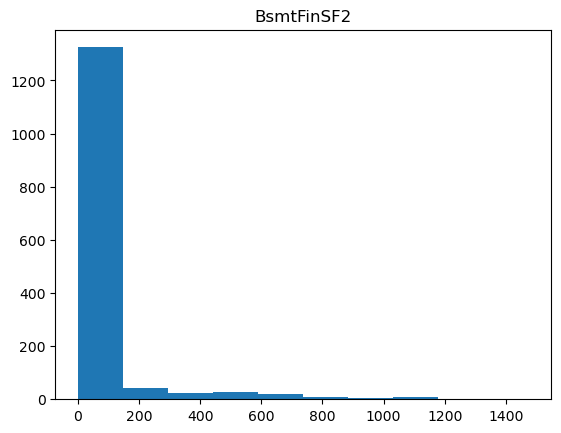

BsmtUnfSF
BsmtUnfSF
0       118
728       9
384       8
600       7
300       7
       ... 
551       1
1257      1
605       1
467       1
136       1
Name: count, Length: 780, dtype: int64


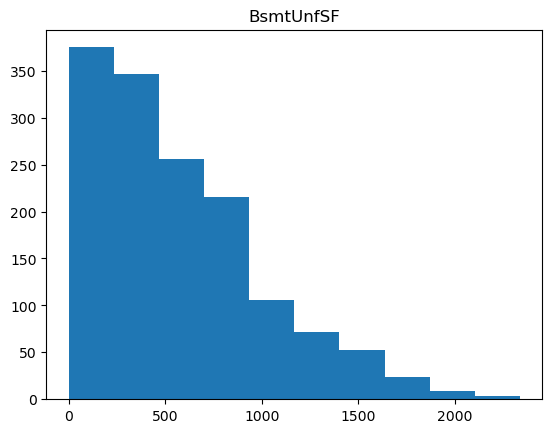

TotalBsmtSF
TotalBsmtSF
0       37
864     35
672     17
912     15
1040    14
        ..
1838     1
1581     1
707      1
611      1
1542     1
Name: count, Length: 721, dtype: int64


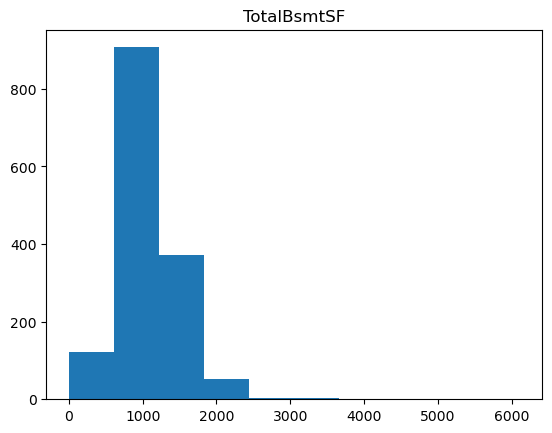

Heating
Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64


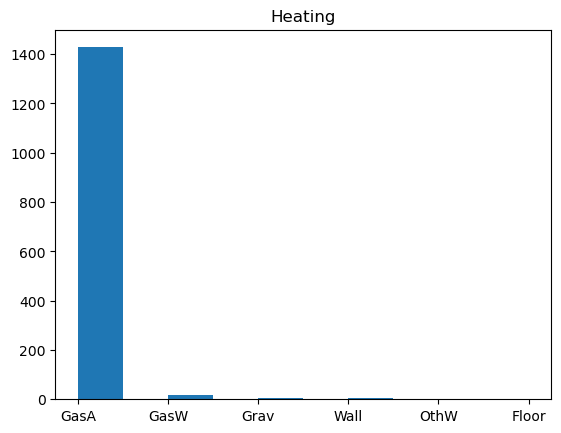

HeatingQC
HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: count, dtype: int64


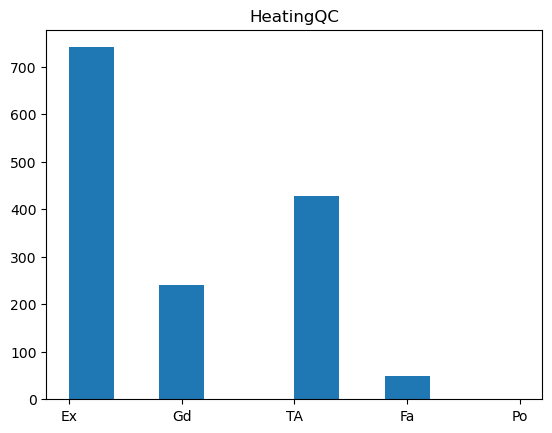

CentralAir
CentralAir
Y    1365
N      95
Name: count, dtype: int64


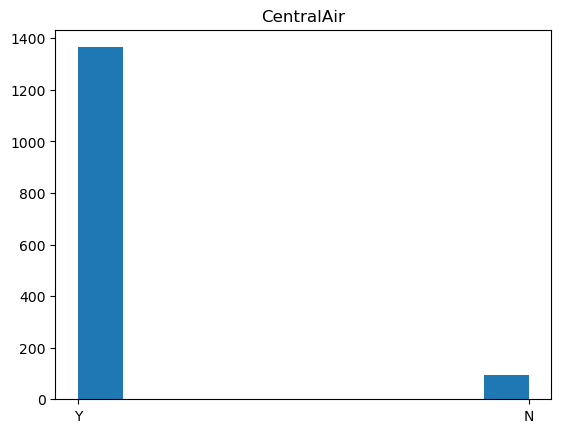

Electrical
Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64
1stFlrSF
1stFlrSF
864     25
1040    16
912     14
894     12
848     12
        ..
1509     1
2515     1
605      1
3138     1
1256     1
Name: count, Length: 753, dtype: int64


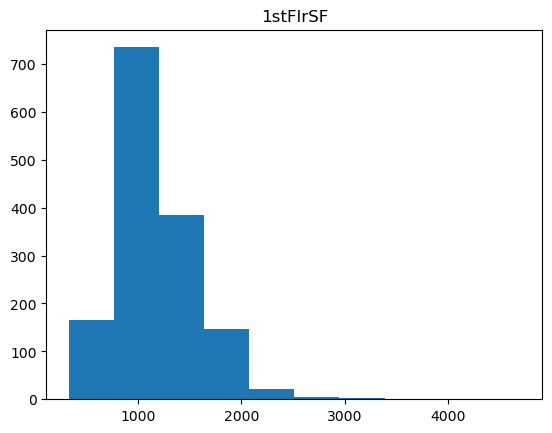

2ndFlrSF
2ndFlrSF
0       829
728      10
504       9
546       8
672       8
       ... 
1538      1
914       1
1067      1
1000      1
1152      1
Name: count, Length: 417, dtype: int64


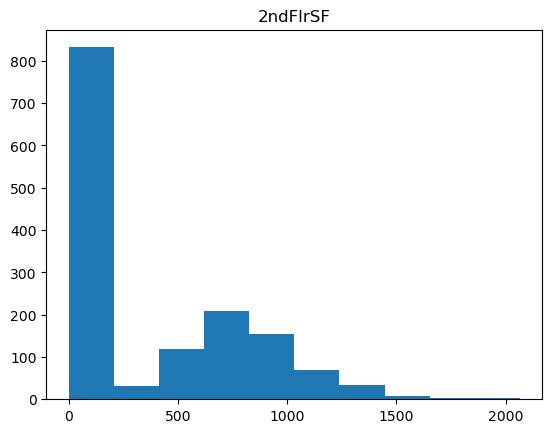

LowQualFinSF
LowQualFinSF
0      1434
80        3
360       2
205       1
479       1
397       1
514       1
120       1
481       1
232       1
53        1
515       1
156       1
473       1
420       1
390       1
371       1
392       1
144       1
572       1
528       1
234       1
513       1
384       1
Name: count, dtype: int64


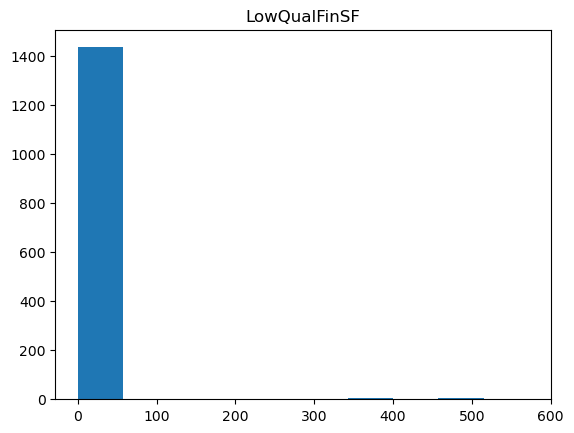

GrLivArea
GrLivArea
864     22
1040    14
894     11
1456    10
848     10
        ..
2296     1
1123     1
1199     1
1473     1
1256     1
Name: count, Length: 861, dtype: int64


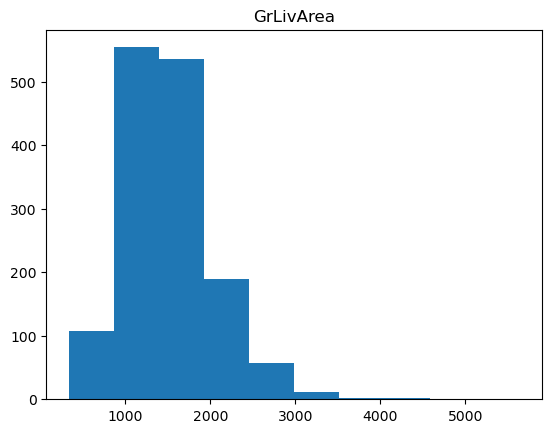

BsmtFullBath
BsmtFullBath
0    856
1    588
2     15
3      1
Name: count, dtype: int64


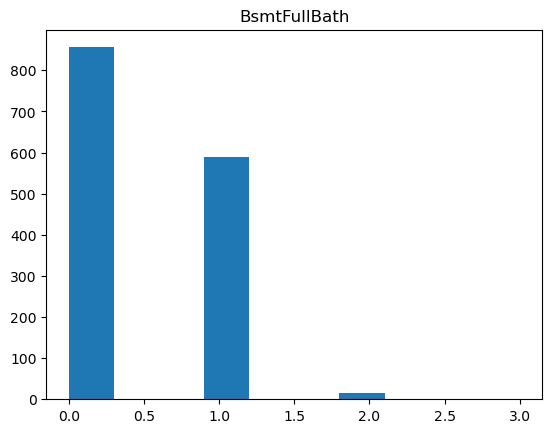

BsmtHalfBath
BsmtHalfBath
0    1378
1      80
2       2
Name: count, dtype: int64


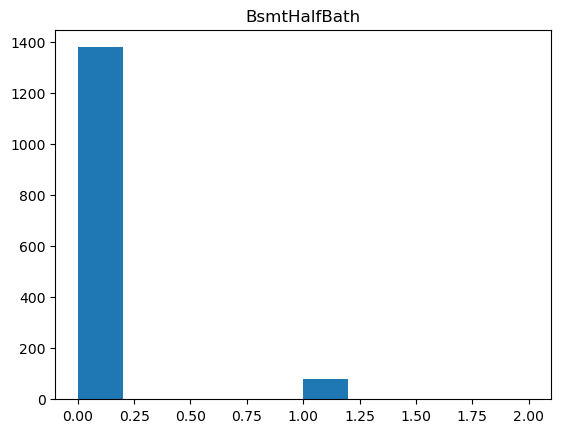

FullBath
FullBath
2    768
1    650
3     33
0      9
Name: count, dtype: int64


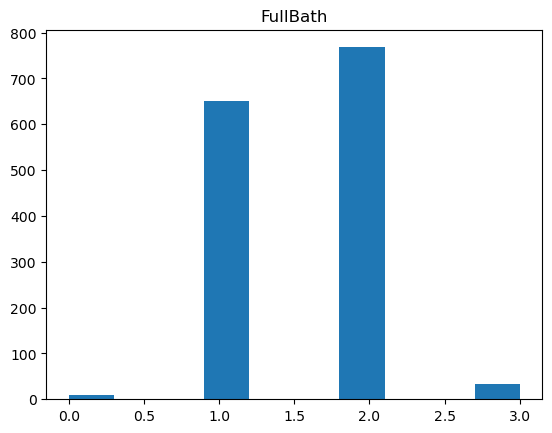

HalfBath
HalfBath
0    913
1    535
2     12
Name: count, dtype: int64


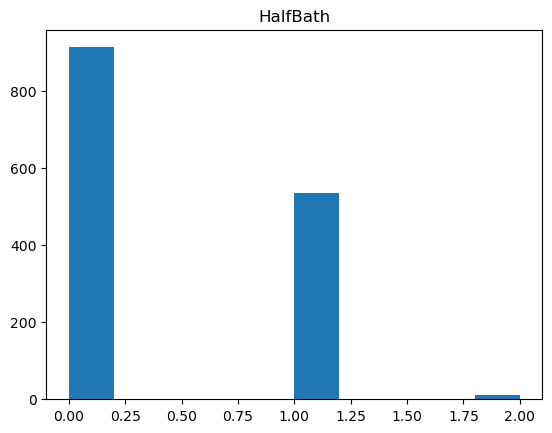

BedroomAbvGr
BedroomAbvGr
c    804
b    358
d    213
a     50
e     29
Name: count, dtype: int64
KitchenAbvGr
KitchenAbvGr
1    1392
2      65
3       2
0       1
Name: count, dtype: int64


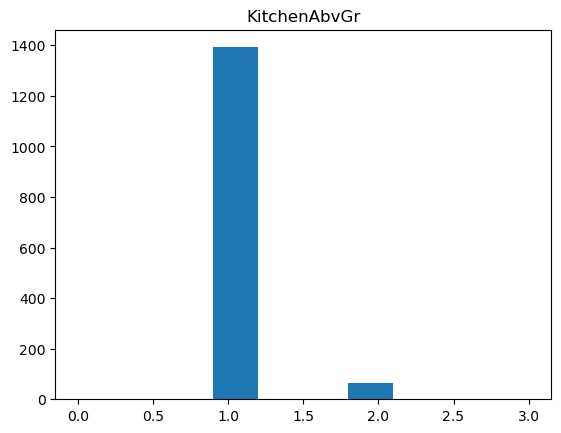

KitchenQual
KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64


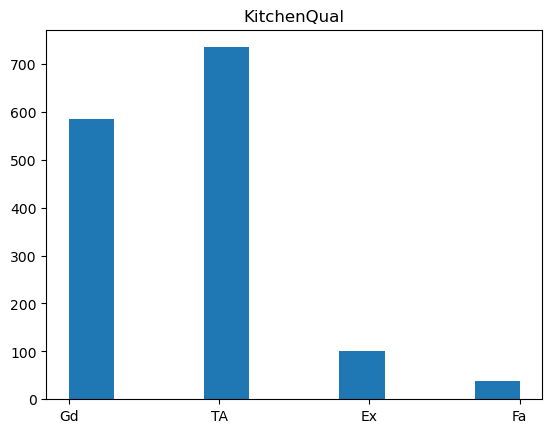

TotRmsAbvGrd
TotRmsAbvGrd
6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: count, dtype: int64


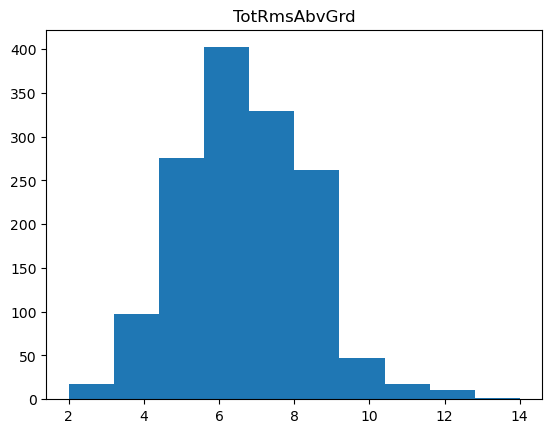

Functional
Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: count, dtype: int64


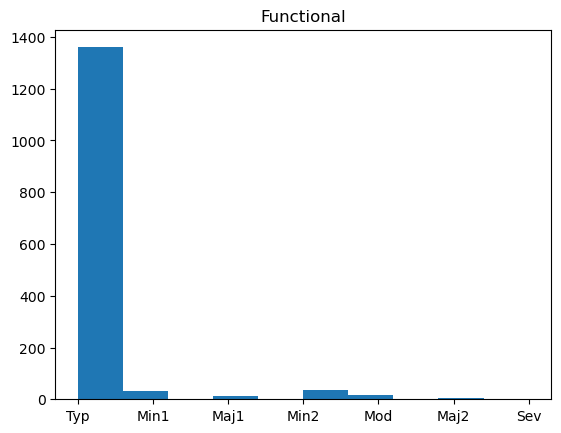

Fireplaces
Fireplaces
0    690
1    650
2    115
3      5
Name: count, dtype: int64


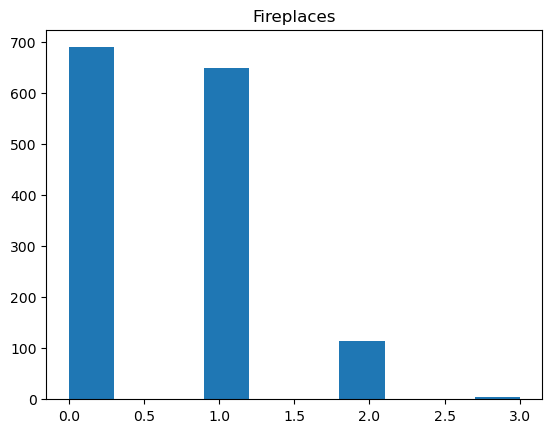

FireplaceQu
FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64
GarageType
GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64
GarageYrBlt
GarageYrBlt
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: count, Length: 97, dtype: int64


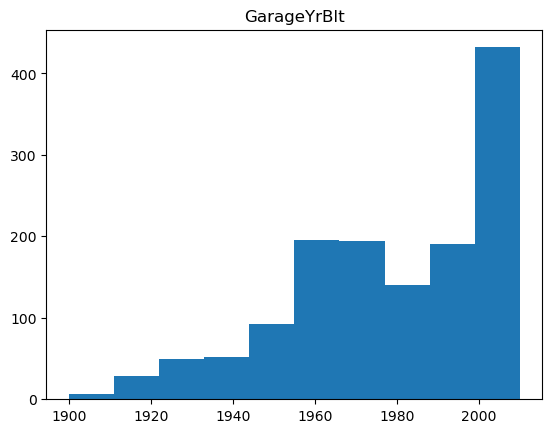

GarageFinish
GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64
GarageCars
GarageCars
2    824
1    369
3    181
0     81
4      5
Name: count, dtype: int64


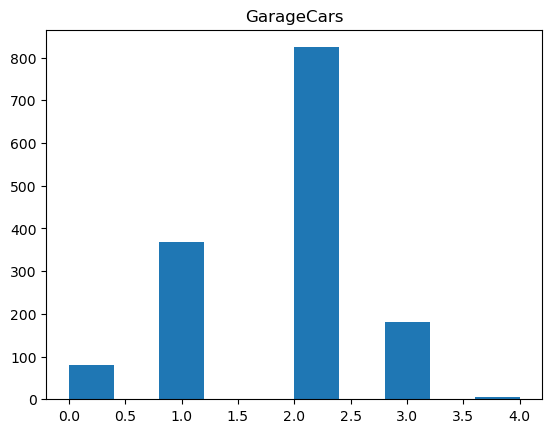

GarageArea
GarageArea
0      81
440    49
576    47
240    38
484    34
       ..
320     1
594     1
831     1
878     1
192     1
Name: count, Length: 441, dtype: int64


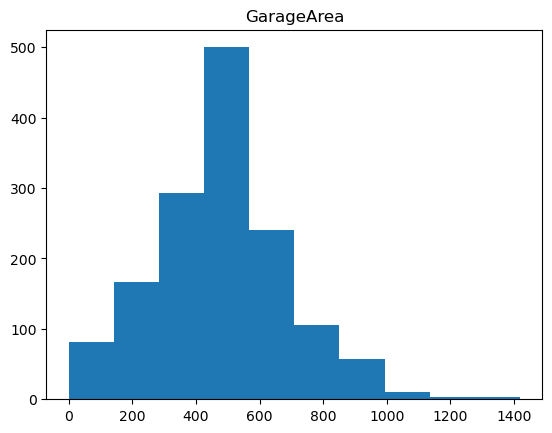

GarageQual
GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64
GarageCond
GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64
PavedDrive
PavedDrive
Y    1340
N      90
P      30
Name: count, dtype: int64
WoodDeckSF
WoodDeckSF
0      761
192     38
100     36
144     33
120     31
      ... 
326      1
179      1
103      1
176      1
736      1
Name: count, Length: 274, dtype: int64


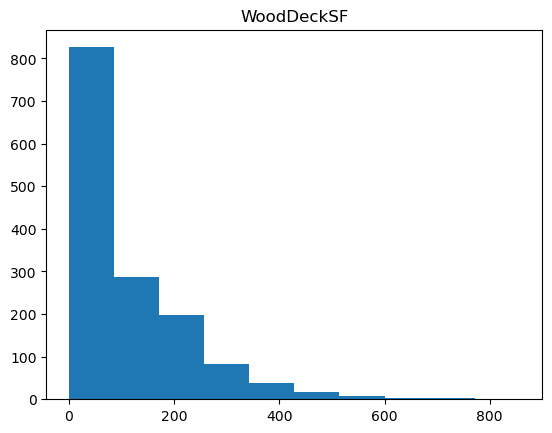

OpenPorchSF
OpenPorchSF
0      656
36      29
48      22
20      21
40      19
      ... 
11       1
523      1
125      1
137      1
236      1
Name: count, Length: 202, dtype: int64


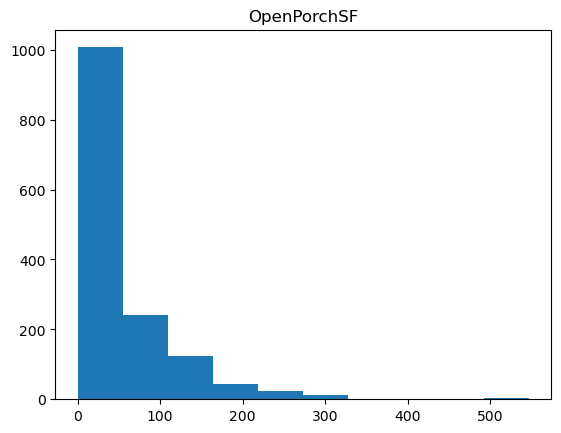

EnclosedPorch
EnclosedPorch
0      1252
112      15
96        6
192       5
144       5
       ... 
54        1
136       1
148       1
140       1
99        1
Name: count, Length: 120, dtype: int64


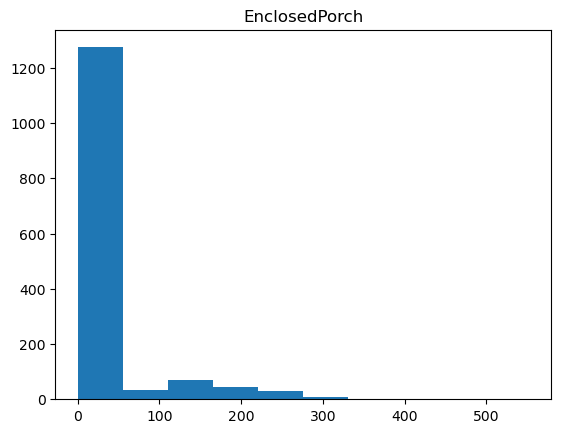

3SsnPorch
3SsnPorch
0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304       1
Name: count, dtype: int64


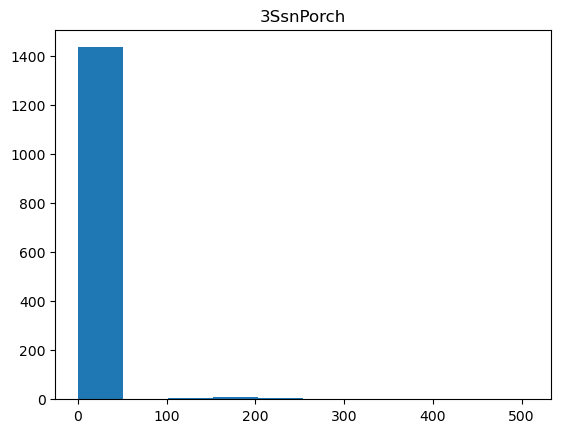

ScreenPorch
ScreenPorch
0      1344
192       6
120       5
224       5
189       4
       ... 
291       1
260       1
385       1
156       1
40        1
Name: count, Length: 76, dtype: int64


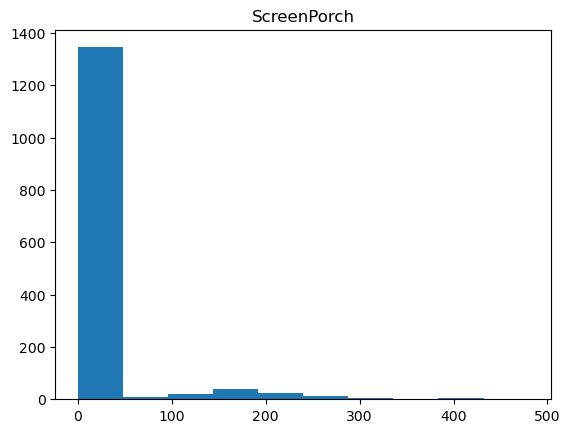

PoolArea
PoolArea
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: count, dtype: int64


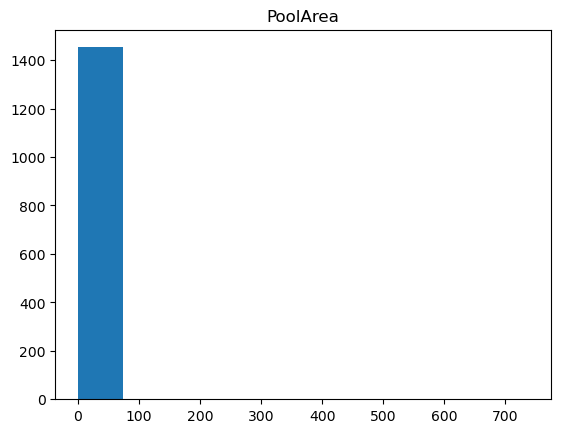

PoolQC
PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64
Fence
Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64
MiscFeature
MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64
MiscVal
MiscVal
0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: count, dtype: int64


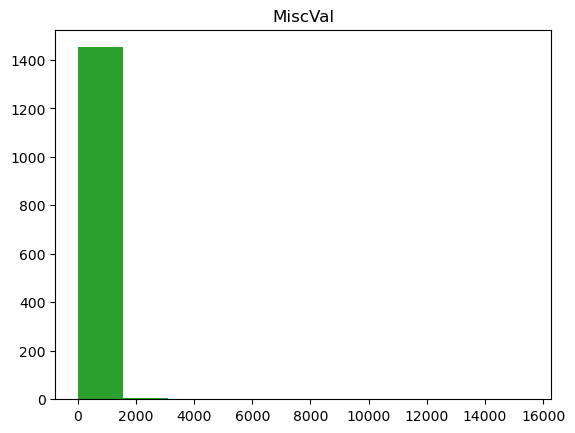

MoSold
MoSold
6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: count, dtype: int64


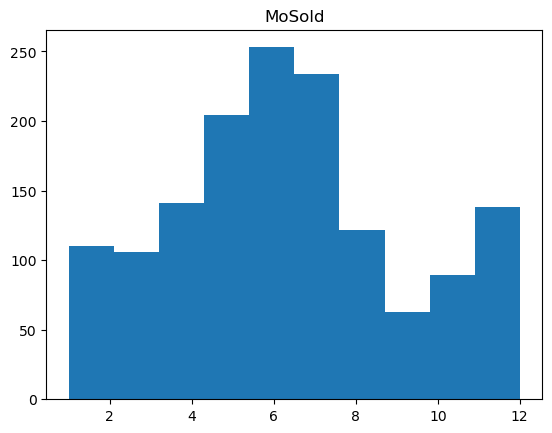

YrSold
YrSold
2009    338
2007    329
2006    314
2008    304
2010    175
Name: count, dtype: int64


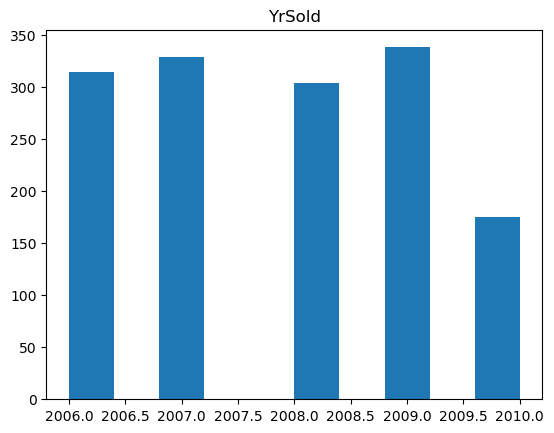

SaleType
SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64


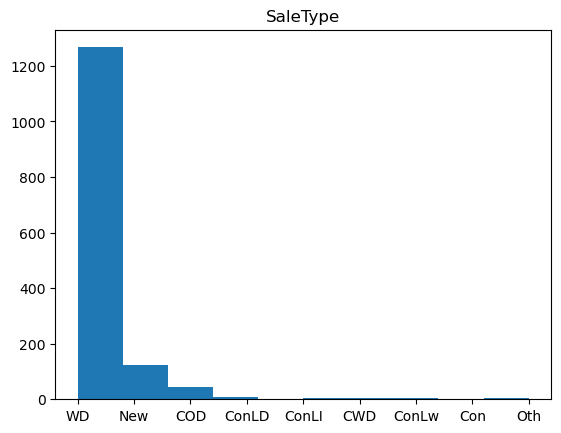

SaleCondition
SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64


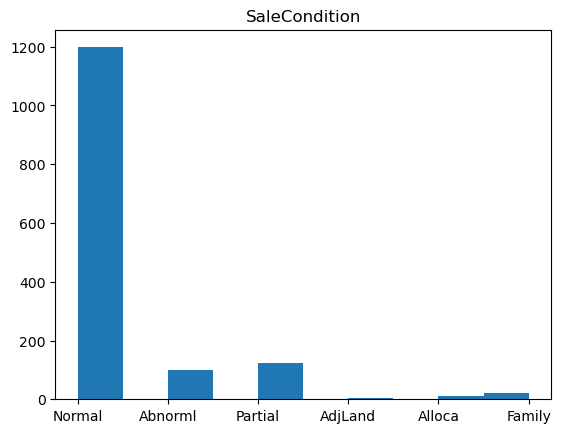

SalePrice
SalePrice
140000    20
135000    17
155000    14
145000    14
190000    13
          ..
202665     1
164900     1
208300     1
181500     1
147500     1
Name: count, Length: 663, dtype: int64


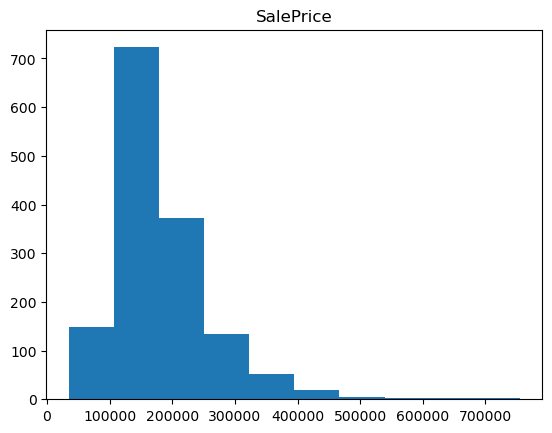

In [183]:
for f in data.columns:
    print(f)
    print(data[f].value_counts())
    try:
        plt.hist(data[f])
        plt.title(f)
        plt.show()
    except:
        pass


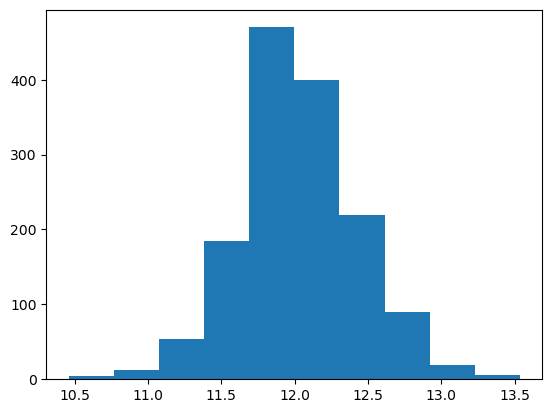

In [184]:
data["SalePrice"] = np.log(data["SalePrice"])

plt.hist(data["SalePrice"])
plt.show()

In [185]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from scipy.stats import mode

# imputation pipelines
log_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('log', FunctionTransformer(np.log, feature_names_out='one-to-one')),
    ('std', StandardScaler())
])
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('std', StandardScaler())
])
obj_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

def binarizer(X):
    most_frequent = pd.Series(X.ravel()).mode()[0]  # Trova il valore più frequente
    return np.where(X == most_frequent, 1, 0).reshape(-1, X.shape[1])
    
binary_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('binary', FunctionTransformer(binarizer, feature_names_out='one-to-one')),
    ('onehot', OneHotEncoder())
])

In [186]:
std_cols = ["LotArea"]
category_cols = ["YearBuilt", "MiscVal"]

minmax_cols = data.select_dtypes(include=np.number).columns.drop("SalePrice")
category_cols = data.select_dtypes(include=object).columns

In [187]:
from sklearn.compose import ColumnTransformer

y_train = data['SalePrice'].astype(dtype=float)
data = data.drop('SalePrice', axis=1)

# Remove target variable from categorical columns
binary_columns = ['PoolArea', 'RoofMatl']
obj_columns = data.select_dtypes(exclude=[int, float]).columns.drop(binary_columns, errors='ignore')
log_columns = ["LotArea", "GrLivArea", "LotFrontage"]

# Combine transformers using ColumnTransformer
preprocessing = ColumnTransformer(
    transformers=[
        ('obj', obj_pipeline, obj_columns),
        ('log', log_pipeline, log_columns),
        ('bin', binary_pipeline, binary_columns)
    ], remainder=num_pipeline
)

# Create a pipeline with the preprocessor
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessing)
])


X_train = pipeline.fit_transform(data)

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <BarContainer object of 10 artists>)

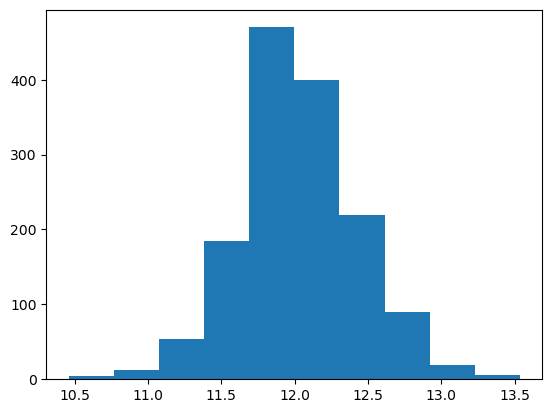

In [188]:
plt.hist(y_train)

In [ ]:
from sklearn.svm import SVR as SVR
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
models = {
    'SVM': SVR(),
    'KRidge': KernelRidge(),
    'Ridge' : Ridge(random_state=10, max_iter=50000)
}

# Define the hyperparameter grids for each model
param_grids = {
    'SVM': {
        'kernel' : ['linear', 'poly', 'sigmoid'],
        'degree' : [2, 3, 4]
    },
    'Ridge' : {
        'alpha' : [8.0, 9.0, 10.0, 11.0],
        'solver' : ['auto', 'lsqr', 'sag']
    },
    'KRidge' : {
        'alpha' : [0.2, 0.4, 0.6, 0.8],
        'gamma' : [None],
        'kernel' : ["linear", "poly", "polynomial"],
        'degree' : [1, 2, 3]
    }
}

In [190]:
# Train and tune the models
from sklearn.model_selection import GridSearchCV

grids = {}
for model_name, model in models.items():
    print(f'Training and tuning {model_name}...')
    grids[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=1)
    grids[model_name].fit(X_train, y_train.values.ravel())
    best_params = grids[model_name].best_params_
    best_score = grids[model_name].best_score_
    
    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best accuracy for {model_name}: {-best_score}\n')

Training and tuning SVM...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters for SVM: {'degree': 2, 'kernel': 'poly'}
Best accuracy for SVM: 0.1259699920783689

Training and tuning KRidge...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters for KRidge: {'alpha': 0.5, 'degree': 3, 'gamma': None, 'kernel': 'poly'}
Best accuracy for KRidge: 0.12518149337445955

Training and tuning Ridge...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for Ridge: {'alpha': 9.0, 'solver': 'auto'}
Best accuracy for Ridge: 0.12945501358827757



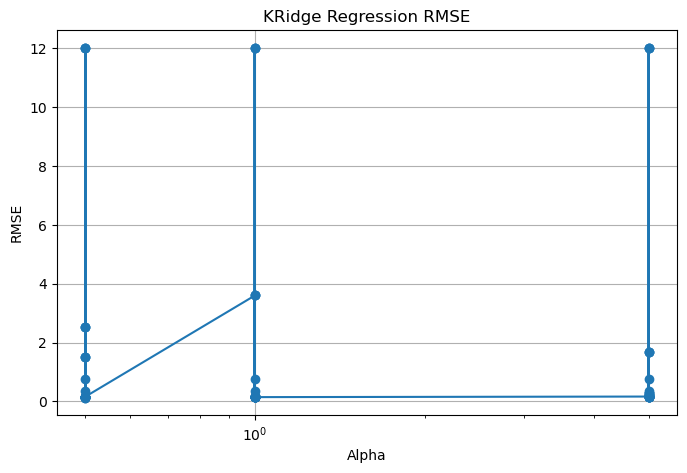

In [191]:
# Estrai i valori di alpha e i punteggi della Ridge Regression
ridge_alphas = grids['KRidge'].cv_results_['param_alpha'].data  # Lista di alpha testati
ridge_scores = -grids['KRidge'].cv_results_['mean_test_score']  # Negativo perché usa RMSE (errore → positivo)

# Ordina per alpha
sorted_indices = np.argsort(ridge_alphas)
ridge_alphas = np.array(ridge_alphas)[sorted_indices]
ridge_scores = np.array(ridge_scores)[sorted_indices]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(ridge_alphas, ridge_scores, marker='o', linestyle='-')
plt.xscale('log')  # Se gli alpha sono su più ordini di grandezza
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('KRidge Regression RMSE')
plt.grid(True)
plt.show()

In [192]:
test_raw_data = pd.read_csv("data/test.csv")
test_data = test_raw_data[selected_features].copy()

edges = [0, 1970, 1990, 2000, 2050]
labels = ["a", "b", "c", "d"]
test_data["YearRemodAdd"] = pd.cut(test_data['YearRemodAdd'], edges, labels=labels)

edges = [0, 1900, 1950, 1980, 2000, 2010, 2050]
labels = ["a", "b", "c", "d", "e", "f"]
test_data["YearBuilt"] = pd.cut(test_data['YearBuilt'], edges, labels=labels)

edges = [0., 1.1, 2.1, 3.1, 4.1, 10.]
labels = ["a", "b", "c", "d", "e"]
test_data["BedroomAbvGr"] = pd.cut(test_data['BedroomAbvGr'], edges, labels=labels)

test_data['PoolArea'] = test_data['PoolArea'].isin([0]).astype(int)


X_test = pipeline.transform(test_data)

In [ ]:
import csv

pred = grids['Kridge'].predict(X_test)

In [194]:
f = open("out.csv", "w")
f.write("Id,SalePrice")
for i in range(len(pred)):
    f.write("\n")
    f.write(str(i+1461) + "," + str(np.exp(pred[i])))
f.close()